<a href="https://colab.research.google.com/github/MateusSantosF/ASimpleGeneticAlgortithm/blob/main/Bug_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
from random import randint
from functools import cmp_to_key
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

florestColor = [100,35,50] #cor da floresta, que o inseto deve se adaptar
rF = florestColor[0] 
gF = florestColor[1]
bF = florestColor[2]

maxPopulation = 1000 #população maxima
floorMutationNumber = 96 # numero que o algoritmo de mutação se baseia, para realizar, ou não, a mutação
mutationIncrease = 5 # quantidade de cor que a mutação adiciona ou decrementa
goodsCreaturePerPopulation = 10 #ELITISMO- qtd de melhores individuos mantidos por cada nova geração



In [187]:

def crossover(bug1,bug2): # gera um novo individuo, com base em outro
    bugOneColors = [bug1.r, bug1.g,bug1.b]
    bugTwoColors = [bug2.r, bug2.g,bug2.b]
    randomColor = randint(0, 2)
    bugTwoColors[randomColor] = bugOneColors[randomColor]
    newBug = Bug()
    newBug.r = bugTwoColors[0]
    newBug.g = bugTwoColors[1]
    newBug.b = bugTwoColors[2]
    newBug.setFitness()
    return newBug

def mutation(bug1): #realiza uma mutação, ou não, com base em um valor randomico

  randomNumber = randint(0,100)
  if randomNumber >= floorMutationNumber:
    bugColor = [bug1.r, bug1.g, bug1.b]
    randomColor = randint(0,2)
    randomOperation = randint(0,100)
    if randomOperation <= 50:
      bugColor[randomColor] = bugColor[randomColor] + mutationIncrease;
    else:
      bugColor[randomColor] = bugColor[randomColor] - mutationIncrease;

    if bugColor[randomColor] > 255:
        bugColor[randomColor] = bugColor[randomColor] - (mutationIncrease * 3)
    if bugColor[randomColor] < 0:
        bugColor[randomColor] = bugColor[randomColor] * -1 

    bug1.r = bugColor[0]
    bug1.g = bugColor[1]
    bug1.b = bugColor[2]
    bug1.setFitness()
    return bug1;
  else:
    return bug1;

def fitnessAverage(bugs): #calcula a média do fitness da lista de insetos recebida
    average = 0.0
    for x in bugs:
      average += x.fitness

    return float(average/len(bugs))

In [188]:
class Bug:
    
    def __init__(self):
        self.r = randint(0,255)
        self.g = randint(0,255)
        self.b = randint(0,255)
        self.fitness = float( (((abs(rF - self.r)/255) + (abs(gF - self.g)/255) + (abs(bF - self.b)/255) )/3) * 100) 

    def __str__(self):
        return '[{},{},{}]'.format(self.r, self.g, self.b)

    def setFitness(self):
       self.fitness = float( (((abs(rF - self.r)/255) + (abs(gF - self.g)/255) + (abs(bF - self.b)/255) )/3) * 100) 


In [189]:
def bug_comparator(Bug1, Bug2):
   if Bug1.fitness < Bug2.fitness:
      return -1
   elif Bug1.fitness > Bug2.fitness:
      return 1
   else:
      return 0

In [190]:
class Generation:
  def __init__(self, generationNumber, averageFitness):
      self.generationNumber = generationNumber
      self.averageFitness = averageFitness;


In [191]:
class Population:

  def __init__(self):
    self.bugs = []

  def createPopulation(self,maxPopulation):
    for i in range(maxPopulation):
      self.bugs.append(Bug())

    return self.bugs;

  def getMaxFitnessBugsCurrentPopulation(self): #retorna os melhores individuos da população
    ordered = sorted(self.bugs, key = cmp_to_key(bug_comparator), reverse=True)
    return ordered[-goodsCreaturePerPopulation:] 

  def createNewBug(self):
    crossOrMutation = randint(0,100)  
    if crossOrMutation <= 50:
      return crossover(self.bugs[randint(0,len(self.bugs) - 1)], self.bugs[randint(1,len(self.bugs)-1)])
    else:
      return mutation(self.bugs[randint(0,len(self.bugs) - 1)])  

In [192]:
fitnessFloor = 0.03;  #porcentagem de fitness dos melhores individuos da população

dataset = [ ]

def generateNewPopulations():
    initialPopulation = Population()
    initialPopulation.createPopulation(maxPopulation)
    maxGenerations = 1000
    currentGeneration = 1;

    currentPopulation = initialPopulation;
    averageFit = fitnessAverage(currentPopulation.getMaxFitnessBugsCurrentPopulation())
    dataset.append(Generation(currentGeneration, fitnessAverage(currentPopulation.bugs))) #cria dataset para plotar

    # Condição de parada se baseia em atingir um fitnessFloor ou N max de gerações | poderiamos tbm verificar o fitness das ultimas 3 
    # gerações e se o fitness global continuasse igual ou muito proximo, parar o algoritmo
    while averageFit > fitnessFloor and currentGeneration < maxGenerations:
      
      newBugsPopulation = currentPopulation.getMaxFitnessBugsCurrentPopulation() #elitismo -> recuperando melhores insetos da população atual
      while (len(newBugsPopulation) < maxPopulation): #enquanto a população nova n tiver o mesmo tamanho da antiga continua enchendo o array
          newBugsPopulation.append(currentPopulation.createNewBug()) #gera novos individuos com base na população atual

      currentPopulation.bugs = newBugsPopulation
      averageFit = fitnessAverage(currentPopulation.getMaxFitnessBugsCurrentPopulation()) #MEDIA COM BASE NOS MELHORES
      currentGeneration += 1;
      dataset.append(Generation(currentGeneration, fitnessAverage(currentPopulation.bugs))) #MÉDIA COM BASE EM TODOS 

    return currentPopulation;


populationFinal = generateNewPopulations()

Florest Color:  [100, 35, 50]
Fitness minimum: 0.03
Best Fitness inside bests bugs:  0.261437908496732
Colors of 10 best bugs
[101,35,51]
[101,35,51]
[101,35,51]
[101,35,51]
[101,35,51]
[101,35,51]
[101,35,51]
[101,35,51]
[101,35,51]
[101,35,51]


Text(613, 6.455032679738561, 'MinPoint (613.000, 1.455)')

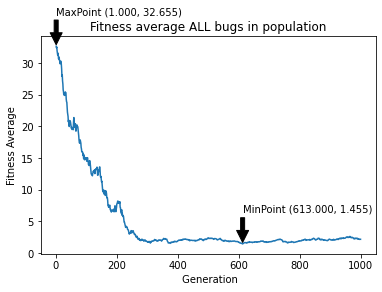

In [193]:
print("Florest Color: ", florestColor)
print("Fitness minimum:", fitnessFloor)
print("Best Fitness inside bests bugs: ", populationFinal.getMaxFitnessBugsCurrentPopulation()[goodsCreaturePerPopulation -1].fitness )
print("Colors of {0} best bugs".format(goodsCreaturePerPopulation))
for bestBug in populationFinal.getMaxFitnessBugsCurrentPopulation():
  print(bestBug)

#FIRST PLOT
X = [] # Generations
y = [] # Average fitness
for generation in dataset:
  X.append(generation.generationNumber)
  y.append(generation.averageFitness)

fig, ax = plt.subplots()
ax.plot(X,y)
plt.xlabel(' Generation')
plt.ylabel('Fitness Average')
plt.title("Fitness average ALL bugs in population")

# PLOT ARROW
ymax = max(y)
xpos = y.index(ymax)
xmax = X[xpos]

ymin = min(y)
xminPos = y.index(ymin)
xmin = X[xminPos]

ax.annotate("MaxPoint ({:.3f}, {:.3f})".format(xmax, ymax), xy=(xmax, ymax), xytext=(xmax, ymax+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate("MinPoint ({:.3f}, {:.3f})".format(xmin, ymin), xy=(xmin, ymin), xytext=(xmin, ymin+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
